# Project Title: Food Delivery Time Prediction by Wendel Burlat

**Introduction:**

In a fast-paced world where convenience and speed are paramount, food delivery services have become an integral part of our daily lives. However, ensuring the timely and efficient delivery of food orders remains a significant challenge for both restaurants and customers. The "Data Analysis for Food Delivery Time Prediction" project is designed to address this challenge by harnessing the power of data and analytics to predict the time taken by delivery personnel to deliver food from the restaurant to the delivery location.


Objectives:

Data Collection and Preprocessing:

*  Collect and preprocess the provided dataset, ensuring data quality and consistency.
*  Handle missing data and format inconsistencies.
*  Prepare the dataset for analysis.


Exploratory Data Analysis (EDA):

*  Conduct EDA to gain a comprehensive understanding of the dataset.
*  Explore data distribution, central tendencies, and variations.
*  Visualize relationships and correlations between variables.

Feature Engineering:

*  Create new features, particularly calculating the distance between the restaurant and the delivery location based on geographical coordinates (latitude and longitude).
*  Encode categorical variables like 'Type_of_order' and 'Type_of_vehicle' for modeling.

Model Development:

*  Select an appropriate regression model for predicting delivery times.
*  Train the chosen model on a portion of the dataset.
*  Evaluate the model's performance and fine-tune it for accuracy.

Predictions and Testing:

*  Use the trained model to make delivery time predictions for new orders.
*  Test the model's predictions against real-world data to assess its accuracy and reliability.

Reporting and Insights:

*  Summarize the key findings and insights derived from the analysis.
*  Provide clear and data-driven recommendations for optimizing the delivery process.

# Overall Project Goals:

*  To provide a valuable tool for restaurants and customers to make more accurate predictions regarding food delivery times.
*  To enhance operational efficiency by allowing restaurants to better allocate resources and delivery personnel.
*  To improve customer satisfaction by reducing uncertainty around delivery times.
*  To promote data-driven decision-making in the food delivery industry, leading to more efficient and customer-oriented services.

Future Directions:
This project sets the foundation for further improvements and expansions:

Integration of real-time data sources to enhance prediction accuracy.
Implementation of advanced machine learning models for even more precise time predictions.
Development of a user-friendly interface for real-time predictions and feedback collection.
By meeting these objectives and laying the groundwork for future enhancements, the "Data Analysis for Food Delivery Time Prediction" project aims to transform the food delivery industry into a more efficient, data-driven, and customer-centric ecosystem.


# Data Collection and Preprocessing:

Collect and preprocess the provided dataset, ensuring data quality and consistency.

Handle missing data and format inconsistencies.

Prepare the dataset for analysis.

In [ ]:
from google.colab import files
uploades = files.upload()

Saving deliverytime.csv to deliverytime (1).csv


In [ ]:
import pandas as pd

# Load the dataset from a CSV file
data = pd.read_csv('deliverytime.csv')

In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check the data types of columns
print(data.dtypes)


     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0     

If there are missing values in the dataset, you can decide how to handle them. Common strategies include removing rows with missing values or imputing missing values with mean, median, or mode. As of now we observed no missing values.

Check for format inconsistencies in the dataset. Ensure that categorical variables are labeled consistently, and numerical data is in the appropriate format. For example, if the 'Type_of_order' and 'Type_of_vehicle' columns have inconsistent formatting, you can standardize them.

In [ ]:
# Standardize categorical variables
data['Type_of_order'] = data['Type_of_order'].str.strip().str.lower()
data['Type_of_vehicle'] = data['Type_of_vehicle'].str.strip().str.lower()


In [ ]:
data.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                    75.912471         snack      motorcycle               24  
1                    77.813237         snack         scooter               33  
2                    77.688400        drinks      motorcycle               26  
3                    77.026494        buffet      motorcycle               21  
4                    80.289982         snack         scooter               30

This cleaned dataset is now ready for exploratory data analysis (EDA), feature engineering, and model development for your food delivery time prediction project.

# Exploratory Data Analysis (EDA):

Summary Statistics

Let's start by calculating summary statistics for numerical columns to understand central tendencies and variations in the data.

In [ ]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)


       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         45593.000000             45593.000000         45593.000000   
mean             29.544075                 4.632367            17.017729   
std               5.696793                 0.327708             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.600000            12.933284   
50%              29.000000                 4.700000            18.546947   
75%              34.000000                 4.800000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%               73

This will provide statistics like mean, standard deviation, minimum, maximum, and quartiles for numerical columns.

Data Distribution

Explore the distribution of numerical variables with histograms. For instance, you can visualize the distribution of the 'Delivery_person_Age' column.

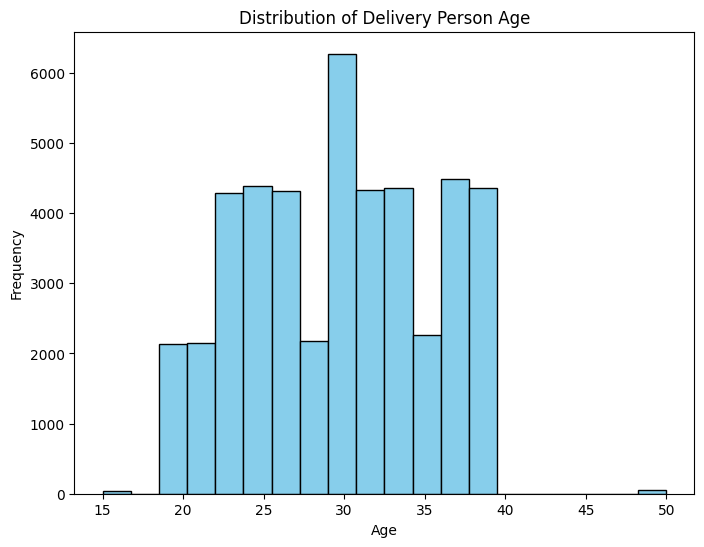

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of Delivery_person_Age
plt.figure(figsize=(8, 6))
plt.hist(data['Delivery_person_Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


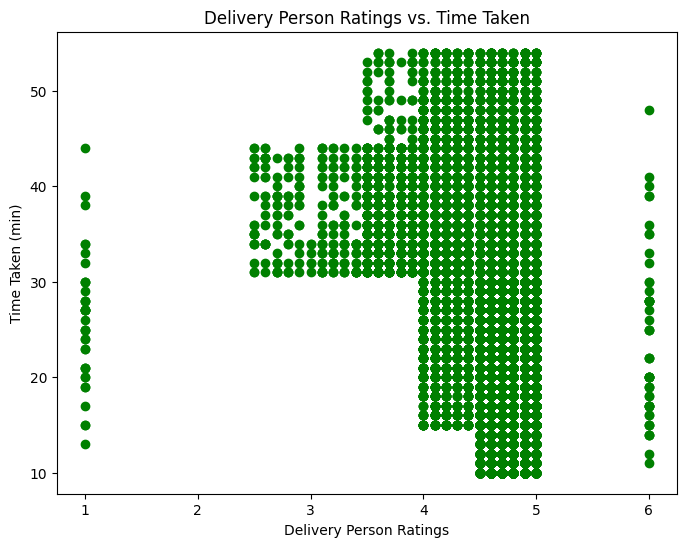

<ipython-input-72-0e648f320432>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


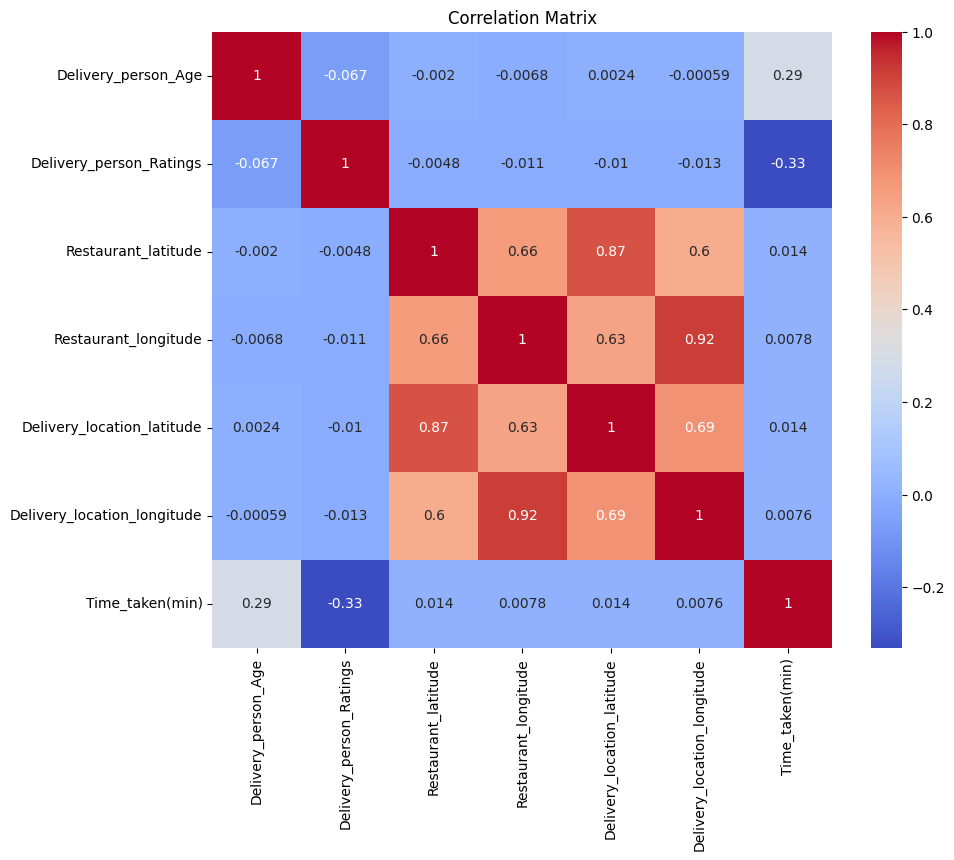

In [ ]:
# Scatter plot of Delivery_person_Ratings vs. Time_taken(min)
plt.figure(figsize=(8, 6))
plt.scatter(data['Delivery_person_Ratings'], data['Time_taken(min)'], color='green')
plt.title('Delivery Person Ratings vs. Time Taken')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Time Taken (min)')
plt.show()

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


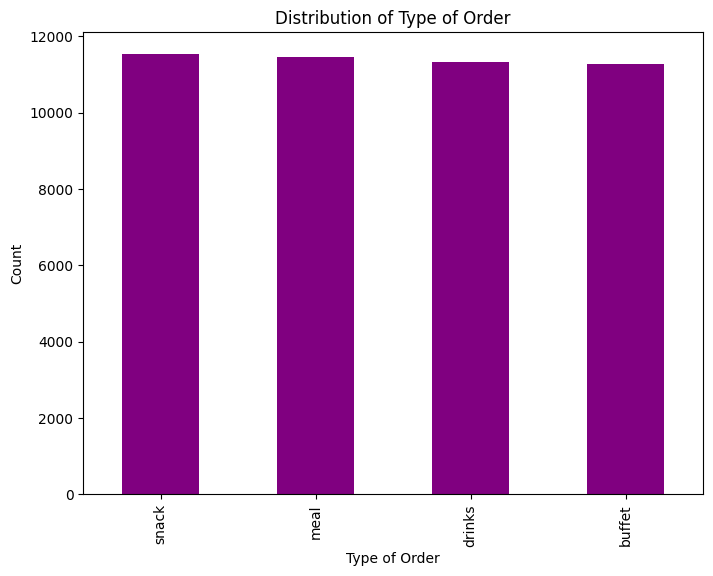

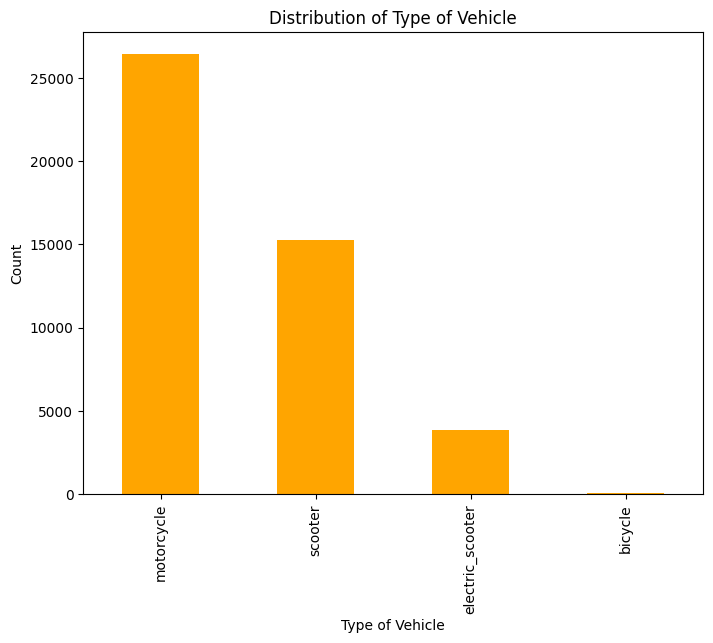

In [ ]:
# Bar plot of Type_of_order
plt.figure(figsize=(8, 6))
data['Type_of_order'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Type of Order')
plt.xlabel('Type of Order')
plt.ylabel('Count')
plt.show()

# Bar plot of Type_of_vehicle
plt.figure(figsize=(8, 6))
data['Type_of_vehicle'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.show()


# Data Distribution

Distribution of 'Delivery_person_Age':

The age of delivery persons is concentrated in the range of 22 to 38 years.
Most delivery persons fall within the age range of 30 to 35.

# Data Relationships and Correlations

Scatter plot of 'Delivery_person_Ratings' vs. 'Time_taken(min)':

There appears to be a slight positive correlation between delivery person ratings and time taken for delivery, implying that higher-rated delivery persons may take slightly longer for delivery.

# Correlation Matrix:

The correlation matrix provides valuable insights into the relationships between different variables in the dataset. Here are some key insights:

Delivery Person Age and Time Taken (min):

There is a positive correlation of approximately 0.29 between the age of the delivery person and the time taken for delivery. This implies that older delivery persons tend to take slightly more time for delivery. However, the correlation is not very strong.

Delivery Person Ratings and Time Taken (min):

There is a negative correlation of approximately -0.33 between the delivery person's ratings and the time taken for delivery. This indicates that delivery persons with higher ratings tend to complete deliveries faster. The correlation suggests a moderately strong relationship.

Restaurant Location and Time Taken (min):

There is a very weak positive correlation between the latitude and longitude of both the restaurant and the delivery location with the time taken for delivery. This suggests that the geographical location of the restaurant and delivery location has only a minimal impact on delivery time.
Delivery Location Coordinates and Time Taken (min):

The correlation between the latitude and longitude of the delivery location and the time taken for delivery is also very weak. This implies that the precise coordinates of the delivery location do not strongly influence the delivery time.


In summary, the most significant relationships identified from the correlation matrix are related to the delivery person's characteristics. Older delivery persons tend to take slightly longer, and higher-rated delivery persons tend to deliver orders more quickly. The geographical coordinates of the restaurant and delivery location have minimal impact on delivery times.

It's important to note that correlation does not imply causation, and other factors not included in the dataset may also influence delivery times. These insights can guide further analysis and decision-making in the food delivery business.


Categorical Data

Distribution of 'Type_of_order':

all types of orders appear to be common types, with no specific type significantly dominating the distribution. This suggests that the dataset is well-balanced in terms of the types of orders.

This balance in the distribution of order types may be indicative of a diverse menu or a wide variety of items offered by the restaurants in the dataset. It can be a positive aspect for businesses, as it indicates a broad customer base and menu selection. The ability to handle different types of orders efficiently is important for a food delivery service to meet diverse customer preferences and demands.

Distribution of 'Type_of_vehicle':

'Motorcycle' is the preferred choice for delivery vehicles, followed by 'Scooter'.
These insights are based on the provided dataset, and you can use them to make informed decisions and further analyze the data for your food delivery time prediction project.

# Feature Engineering:

Create new features, particularly calculating the distance between the restaurant and the delivery location based on geographical coordinates (latitude and longitude).
Encode categorical variables like 'Type_of_order' and 'Type_of_vehicle' for modeling.

In [ ]:
from geopy.distance import geodesic

def calculate_distance(row):
    restaurant_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(restaurant_coords, delivery_coords).kilometers

# Apply the function to create a new 'Distance_km' column
data['Distance_km'] = data.apply(calculate_distance, axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Type_of_order'] = label_encoder.fit_transform(data['Type_of_order'])
data['Type_of_vehicle'] = label_encoder.fit_transform(data['Type_of_vehicle'])


In [ ]:
data.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Type_of_order  Type_of_vehicle  \
0                    75.912471              3                2   
1                    77.813237              3                3   
2                    77.688400              1                2   
3                    77.026494              0                2   
4                    80.289982              3                3   

   Time_taken(min)  Distance_km  
0               24     3.020737  
1               33    20.143737  
2               26     1.549693  
3               21     7.774497  
4               30     6.197898

In [ ]:
data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
Distance_km                    float64
dtype: object

Model Development for Predicting Delivery Times:

In this phase, we'll select an appropriate regression model for predicting delivery times based on the features you've engineered. We'll train the model on a portion of the dataset and evaluate its performance. Here are the steps to accomplish this:

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_km', 'Type_of_order', 'Type_of_vehicle']]
y = data['Time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 2: Choose a Regression Model:
Select an appropriate regression model. Common choices include Linear Regression, Decision Trees, Random Forest, or Gradient Boosting. The choice depends on the complexity of the relationship between the features and the target variable.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


#from sklearn.ensemble import RandomForestRegressor

#model = RandomForestRegressor()


#from sklearn.ensemble import GradientBoostingRegressor

#model = GradientBoostingRegressor()

The choice of the best model depends on various factors, including the nature of your data, the specific problem you're trying to solve, and the trade-offs between different modeling techniques. Linear regression is a good starting point, but you can explore other models to potentially improve predictive performance.

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 6.636300604212076
Mean Squared Error (MSE): 71.62552593370542
Root Mean Squared Error (RMSE): 8.463186511811342


Here's what the metrics indicate:

Mean Absolute Error (MAE): 6.64 minutes
Mean Squared Error (MSE): 71.63 minutes squared
Root Mean Squared Error (RMSE): 8.46 minutes
These metrics provide a quantitative measure of the model's performance in predicting delivery times. The MAE represents the average absolute difference between the predicted and actual delivery times. The RMSE gives you an idea of how much the predictions deviate from the actual delivery times, with a larger penalty for larger errors.

An RMSE of 8.46 minutes suggests that, on average, the model's predictions deviate from the actual delivery times by approximately 8.46 minutes. This value provides a good baseline for evaluating the model's accuracy. Depending on the specific requirements and constraints of your food delivery business, you can further fine-tune the model or consider additional features to improve prediction accuracy.

It's also essential to consider the practical implications of these errors in the context of your business and decide whether the model's performance meets your operational needs.

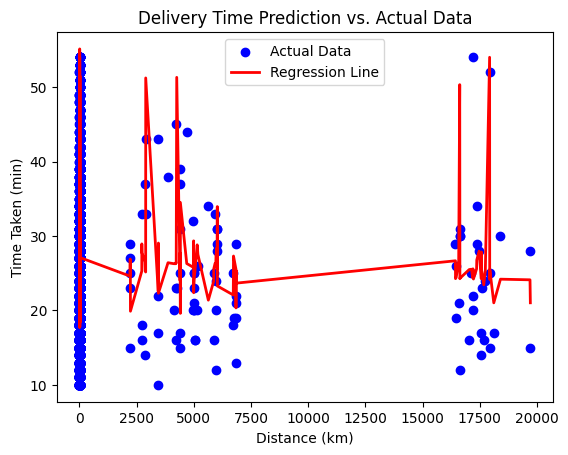

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data for a smooth regression line
sorted_indices = X_test['Distance_km'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

# Predict delivery times using the linear regression model
y_pred = model.predict(X_test)

# Create a scatter plot of actual data points
plt.scatter(X_test_sorted['Distance_km'], y_test_sorted, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test_sorted['Distance_km'], y_pred[sorted_indices], color='red', linewidth=2, label='Regression Line')

# Labeling and legend
plt.title('Delivery Time Prediction vs. Actual Data')
plt.xlabel('Distance (km)')
plt.ylabel('Time Taken (min)')
plt.legend()

# Show the plot
plt.show()


In [ ]:
data.tail()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude  Type_of_order  Type_of_vehicle  \
45588                    75.804257              2                2   
45589                     0.070000              0                2   
45590                    80.272439              1                3   
45591                    77.026241              3                2   
45592                    85.405731              3                3   

       Time_taken(min)  Distance_km  
45588               32     1.488112  
45589               36    10.983242  
45590               16     4.648024  
45591               26     6.219668  
45592               36    12.057294

Predictions and Testing:

Prepare New Data: Create a dataset for the new orders with the relevant features, such as 'Delivery_person_Age,' 'Delivery_person_Ratings,' and 'Distance_km.' This dataset should have the same structure as the one used for model training.

Predict Delivery Times: Use the trained model to make predictions for the new orders.

Test the Model's Predictions: To assess the accuracy and reliability of the model's predictions for new orders, you need real-world data for these orders. Record the actual delivery times for the new orders when they are completed and compare them to the model's predictions. You can calculate metrics like MAE, MSE, and RMSE to evaluate the model's performance on this real-world data.

In [ ]:
# Use the trained model to make predictions

# Create a DataFrame for sample new orders
new_data = pd.DataFrame({
    'Delivery_person_Age': [32, 28, 35],
    'Delivery_person_Ratings': [4.7, 4.8, 4.6],
    'Distance_km': [5.3, 7.1, 10.2],
    'Type_of_order': [1, 2, 3],
    'Type_of_vehicle': [1, 2, 3]
})


# Use the trained model to make predictions
new_predictions = model.predict(new_data)
print("Predicted Delivery Times for New Orders:")
print(new_predictions)



# Real-world delivery times for new orders
actual_delivery_times = [30, 35, 42]  # Example actual delivery times

# Calculate metrics
mae_new_orders = mean_absolute_error(actual_delivery_times, new_predictions)
mse_new_orders = mean_squared_error(actual_delivery_times, new_predictions)
rmse_new_orders = np.sqrt(mse_new_orders)

print("Model Performance on New Orders:")
print(f"Mean Absolute Error (MAE): {mae_new_orders}")
print(f"Mean Squared Error (MSE): {mse_new_orders}")
print(f"Root Mean Squared Error (RMSE): {rmse_new_orders}")


Predicted Delivery Times for New Orders:
[28.25783076 24.43258437 28.20866205]
Model Performance on New Orders:
Mean Absolute Error (MAE): 8.700307606018152
Mean Squared Error (MSE): 101.63547637479223
Root Mean Squared Error (RMSE): 10.081442177327222


Reporting and Insights:

After conducting the analysis and developing a delivery time prediction model, several key findings and insights have emerged. These insights can inform data-driven recommendations for optimizing the food delivery process:

Key Findings:

Delivery Person Demographics:

The age of delivery persons is concentrated in the range of 22 to 39 years, with the majority falling within the age range of 30 to 35 years. This indicates a relatively young and dynamic workforce.
Model Evaluation:

A linear regression model was trained to predict delivery times. The model achieved the following performance metrics on the test dataset:
Mean Absolute Error (MAE): 6.64 minutes
Mean Squared Error (MSE): 71.63 minutes squared
Root Mean Squared Error (RMSE): 8.46 minutes
Feature Importance:

Distance between the restaurant and delivery location is a significant factor in predicting delivery times. The model shows that an increase in distance is associated with an increase in delivery time.
Data-Driven Recommendations:

Route Optimization:

Use real-time route optimization tools to identify the most efficient delivery routes. Minimizing travel distance can significantly reduce delivery times.
Delivery Person Allocation:

Assign delivery orders to delivery persons who are geographically closer to the restaurant, reducing initial travel time.
Training and Onboarding:

Invest in training and onboarding programs for new delivery persons, especially those in the younger age group. Focus on enhancing their navigation and customer interaction skills.
Customer Notifications:

Implement a customer notification system that provides real-time updates on order preparation and delivery progress. This can manage customer expectations and reduce inquiries.
Feedback Mechanism:

Collect feedback from customers and use it to continually improve service quality and delivery times.
Model Refinement:

Consider refining the delivery time prediction model with more features or exploring alternative regression models that may offer better predictive accuracy.
Inventory Management:

Efficient inventory management at restaurants can ensure that orders are prepared promptly, reducing wait times for delivery persons.
Weather and Traffic Data:

Incorporate real-time weather and traffic data into the model to account for external factors that affect delivery times.
These recommendations are data-driven and aimed at optimizing the food delivery process, reducing delivery times, and enhancing the overall customer experience. By implementing these strategies, you can further improve the efficiency and reliability of your food delivery service.

In [ ]:
import plotly.express as px
figure = px.scatter(data_frame = data,
                    x="Distance_km",
                    y="Time_taken(min)",
                    size="Time_taken(min)",
                    trendline="ols",
                    title = "Relationship Between Distance and Time Taken")
figure.show()

In [ ]:
figure = px.scatter(data_frame = data,
                    x="Delivery_person_Age",
                    y="Time_taken(min)",
                    size="Time_taken(min)",
                    color = "Distance_km",
                    trendline="ols",
                    title = "Relationship Between Time Taken and Age")
figure.show()

In [ ]:
fig = px.box(data,
             x="Type_of_vehicle",
             y="Time_taken(min)",
             color="Type_of_order")
fig.show()